<a href="https://colab.research.google.com/github/jvrjsanchez/jvrjsanchez.github.io/blob/main/getting_started_cuda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch, os, math
import torchvision as tv
import torchvision.transforms.functional as tvf
from torchvision import io
import matplotlib.pyplot as plt
from torch.utils.cpp_extension import load_inline

In [3]:
img = io.read_image('puppy.jpg')
print(img.shape)
img[:2,:3,:4]

torch.Size([3, 1706, 2560])


tensor([[[56, 56, 56, 55],
         [56, 56, 55, 55],
         [56, 55, 55, 55]],

        [[72, 72, 72, 71],
         [72, 72, 71, 71],
         [72, 71, 71, 71]]], dtype=torch.uint8)

In [4]:
def show_img(x, figsize=(4,3), **kwargs):
  plt.figure(figsize=figsize)
  plt.axis('off')
  if len(x.shape)==3: x = x.permute(1,2,0) # CHW -> HWC
  plt.imshow(x.cpu(), **kwargs)

In [5]:
img2 = tvf.resize(img, 150, antialias=True)
ch,h,w = img2.shape
ch,h,w,h*w

(3, 150, 225, 33750)

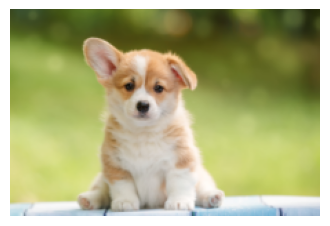

In [6]:
show_img(img2)

In [8]:
def rgb2grey_py(x):
  c,h,w = x.shape
  n = h*w
  x = x.flatten()
  res = torch.empty(n, dtype=x.dtype, device=x.device)
  for i in range(n): res[i] = 0.2989*x[i] + 0.5870*x[i+n] + 0.1140*x[i+2*n]
  return res.view(h,w)

In [9]:
%%time
img_g = rgb2grey_py(img2)

CPU times: user 1.33 s, sys: 2.96 ms, total: 1.34 s
Wall time: 1.36 s


In [10]:
img2.flatten()

tensor([ 56,  57,  57,  ..., 207, 208, 206], dtype=torch.uint8)

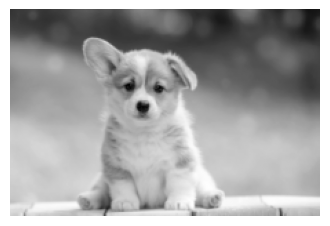

In [11]:
show_img(img_g, cmap='gray')